<a href="https://colab.research.google.com/github/Odera2023/Lithium/blob/main/Lithium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
"""
#PREDICTION OF RUL OF LITHIUM BATTERY
#USING LINEAR REGRESSION MODEL
"""

# Importing necessary libraries
import numpy as np
import joblib
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import time
"""
#PREDICTION OF RUL OF LITHIUM BATTERY
#USING LINEAR REGRESSION MODEL
"""

# Importing necessary libraries
import numpy as np
import joblib
import pandas as pd
import seaborn as sns




In [3]:
import pandas as pd
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load the uploaded CSV file
df = pd.read_csv(next(iter(uploaded)))

# Preview the first few rows
df.head()



Saving Battery_RUL II.csv to Battery_RUL II.csv


,Cycle_Count,Discharge_Time,Decrement,Max_Voltage_Discharge,Min_Voltage_Charge,Time,Time_constant_current,Charging_time,RUL
0,1,2595.30,1151.488500,3.670,3.211,5460.001000,6755.01,10777.82,1112
1,2,7408.64,1172.512500,4.246,3.220,5508.992000,6762.02,10500.35,1111
2,3,7393.76,1112.992000,4.249,3.224,5508.993000,6762.02,10420.38,1110
3,4,7385.50,1080.320667,4.250,3.225,5502.016000,6762.02,10322.81,1109
4,7,3301.18,1194.235077,3.674,3.504,5023.633636,5977.38,5977.38,1106


In [4]:
df.tail()

,Cycle_Count,Discharge_Time,Decrement,Max_Voltage_Discharge,Min_Voltage_Charge,Time,Time_constant_current,Charging_time,RUL
14840,1107,773.00,180.480000,3.774,3.742,922.712,1412.31,6659.62,5
14841,1108,770.44,179.523809,3.773,3.742,922.775,1412.38,6678.88,4
14842,1109,771.12,179.523809,3.773,3.744,915.512,1412.31,6670.38,3
14843,1110,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2
14844,1111,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1


In [5]:
# Split features (X) and target variable (y)
X = df.drop(columns=['RUL'])
y = df['RUL']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
# Make predictions
linear_preds = linear_model.predict(X_test)

# Make predictions on training and test data
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

In [6]:
# Training time calculation
start_time = time.time()
linear_model.fit(X_train, y_train)
training_time = time.time() - start_time

# Prediction time calculation
start_time = time.time()
random_forest_preds = linear_model.predict(X_test)
prediction_time = time.time() - start_time

In [8]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, linear_preds)
mae = mean_absolute_error(y_test, linear_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, linear_preds)

In [9]:
# Print evaluation metrics
print("Evaluation Metrics for Linear Regression:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f"Training Time: {training_time} seconds")
print(f"Prediction Time: {prediction_time} seconds")

Evaluation Metrics for Linear Regression:
MSE: 51.86192738765486
MAE: 4.548690855830531
RMSE: 7.201522574265449
R2: 0.9995035871358319
Training Time: 0.005379676818847656 seconds
Prediction Time: 0.0017693042755126953 seconds


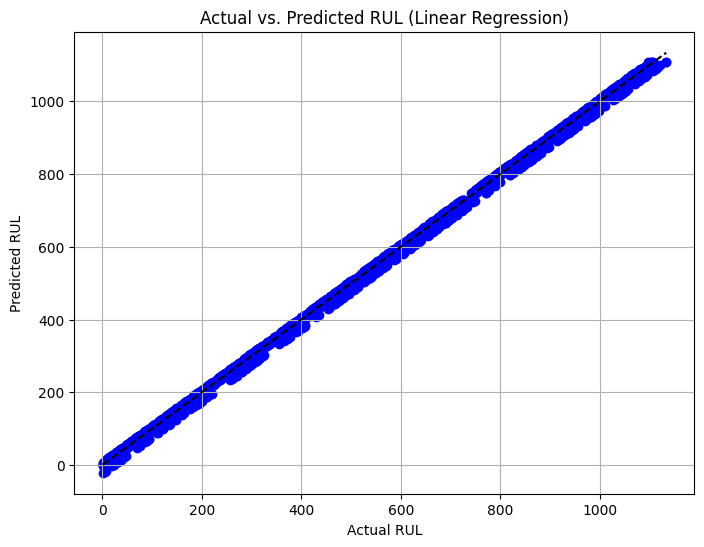

In [10]:
# Visualize actual vs. predicted RUL for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_preds, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs. Predicted RUL (Linear Regression)')
plt.grid(True)
plt.show()

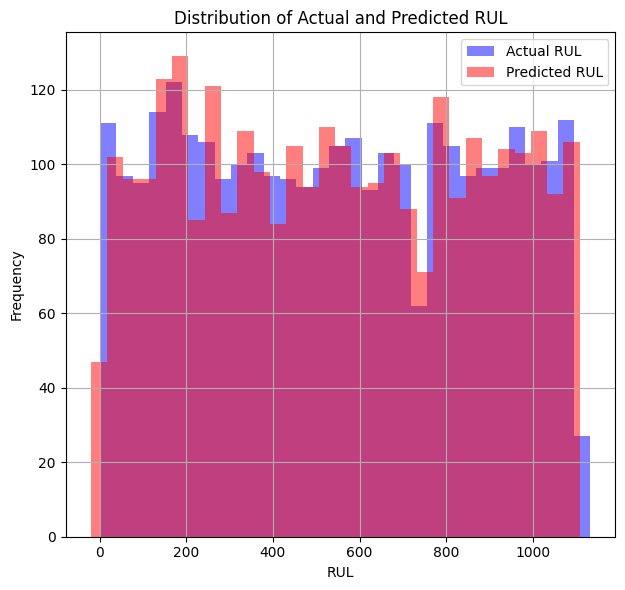

In [11]:
# Visualize actual vs. predicted RUL and their distribution using histograms
plt.figure(figsize=(12, 6))


# Plot distribution of actual and predicted RUL
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=30, alpha=0.5, color='blue', label='Actual RUL')
plt.hist(linear_preds, bins=30, alpha=0.5, color='red', label='Predicted RUL')
plt.xlabel('RUL')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted RUL')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()